# Name- Harsh Kaushik


# Task - Exploratory Data Analysis - Terriorism

Problem Statement- perform EDA on Dataset Global Terriorism

In [1]:
# importing the Libraries


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as p
import seaborn as sns

In [2]:
pd.set_option("display.max_columns", None)

# Reading The Dataset

In [3]:
df=pd.read_csv(r"C:\Users\harsh\Desktop\tasks grip\globalterrorismdb_0718dist.csv",encoding="latin1")

C:\Users\harsh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [5]:
df.isnull().sum().sum() #Contains Null Data  we will Drop the Columns


13853997

In [6]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [7]:

s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['approxdate', 'resolution', 'country_txt', 'region_txt', 'provstate', 'city', 'location', 'summary', 'alternative_txt', 'attacktype1_txt', 'attacktype2_txt', 'attacktype3_txt', 'targtype1_txt', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1_txt', 'targtype2_txt', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2_txt', 'targtype3_txt', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'claimmode_txt', 'claimmode2_txt', 'claimmode3_txt', 'weaptype1_txt', 'weapsubtype1_txt', 'weaptype2_txt', 'weapsubtype2_txt', 'weaptype3_txt', 'weapsubtype3_txt', 'weaptype4_txt', 'weapsubtype4_txt', 'weapdetail', 'propextent_txt', 'propcomment', 'divert', 'kidhijcountry', 'ransomnote', 'hostkidoutcome_txt', 'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'related']


In [8]:
df['region_txt'].unique()

array(['Central America & Caribbean', 'North America', 'Southeast Asia',
       'Western Europe', 'East Asia', 'South America', 'Eastern Europe',
       'Sub-Saharan Africa', 'Middle East & North Africa',
       'Australasia & Oceania', 'South Asia', 'Central Asia'],
      dtype=object)

In [9]:
df["iyear"].value_counts()
# every year how much incidents happened

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: iyear, dtype: int64

# Data Visualization

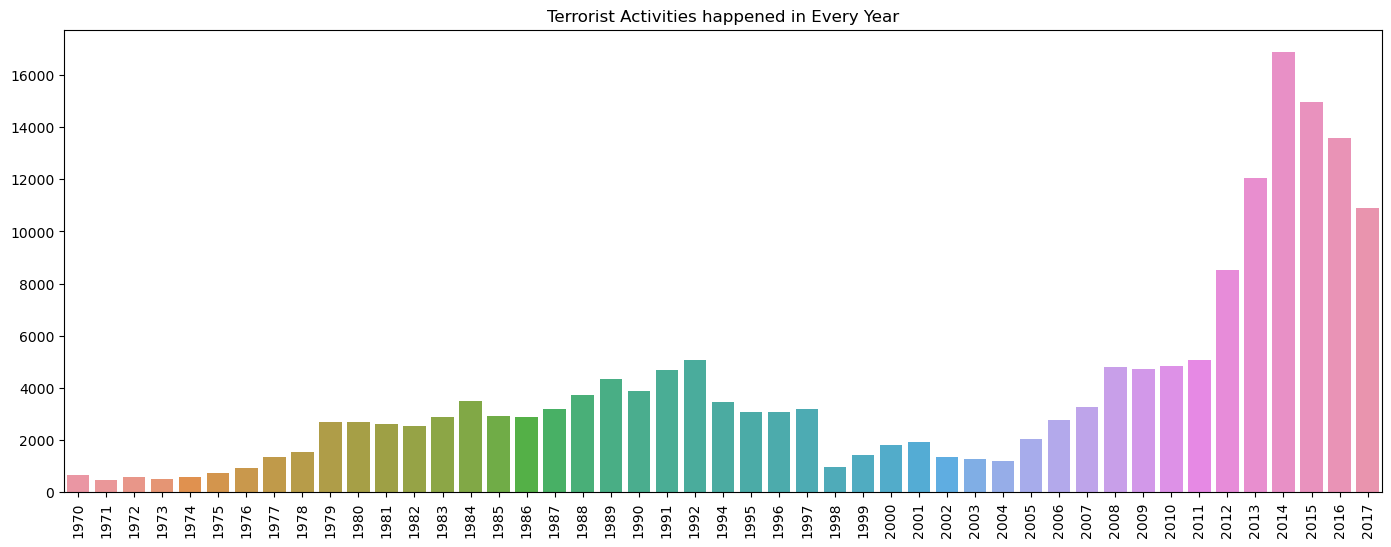

In [10]:

plt.subplots(figsize=(17,6))
plt.xticks(rotation=90)
plt.title("Terrorist Activities happened in Every Year")
sns.barplot(x=df["iyear"].value_counts().index,y=df["iyear"].value_counts().values)
plt.show()



## There is increasing Curve From 1970-1992.It can be Cause of Many Certain Reasons.
### AFTER THAT THERE WAS A SLIGHT DELAY .. BUT AFTER 2001 ,9/11  THERE WERE SILENT FOR A WHILE. 
#### THEN THEY STARTED INCREASING AT AN ALARMING RATE.



## IT CAN BE DUE TO THE WEAK POLICIES OF THE GOVT'S TO STOP THE TERRIORISM

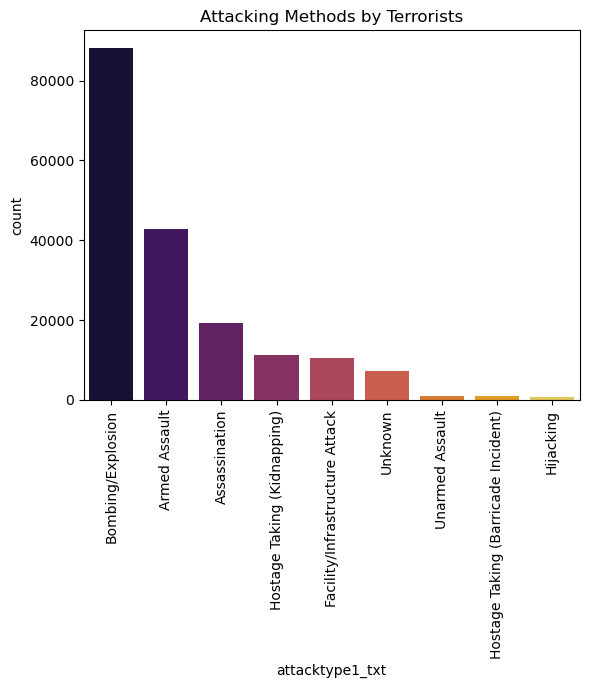

In [11]:
# lETS LOOK AT THE MOST COMMOM ATTACK METHODS
# plt.subplots(figsize=(15,6))
sns.countplot(x='attacktype1_txt',data=df, palette='inferno',order=df['attacktype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking Methods by Terrorists')
plt.show()


# The Most Common Method is Bombing/Explosion which is more than 80K times, Way more than any other Method. 

In [12]:
# lets look at their attack patterns 

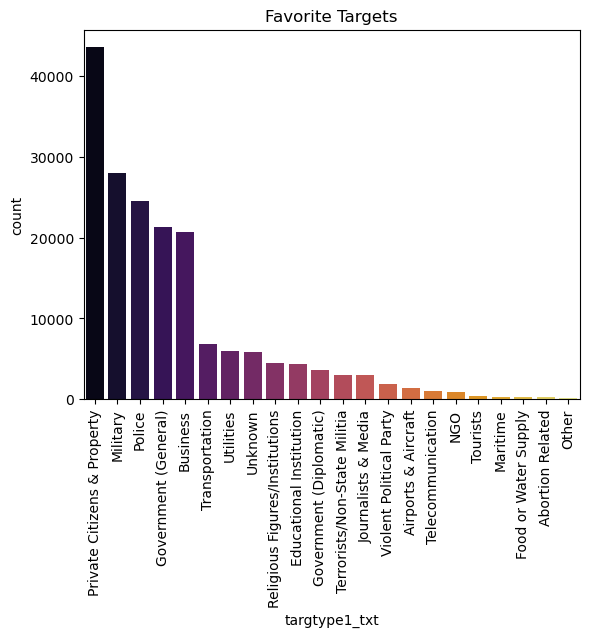

In [13]:
sns.countplot(x=df['targtype1_txt'], palette='inferno', order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Favorite Targets')
plt.show()


## Most of the attacks were happened to Citizens  to scare them or make them live in Fear  and to Military which is basically their arch enemy

In [14]:
# Lets look at which region is affected most by Terriorist Globally

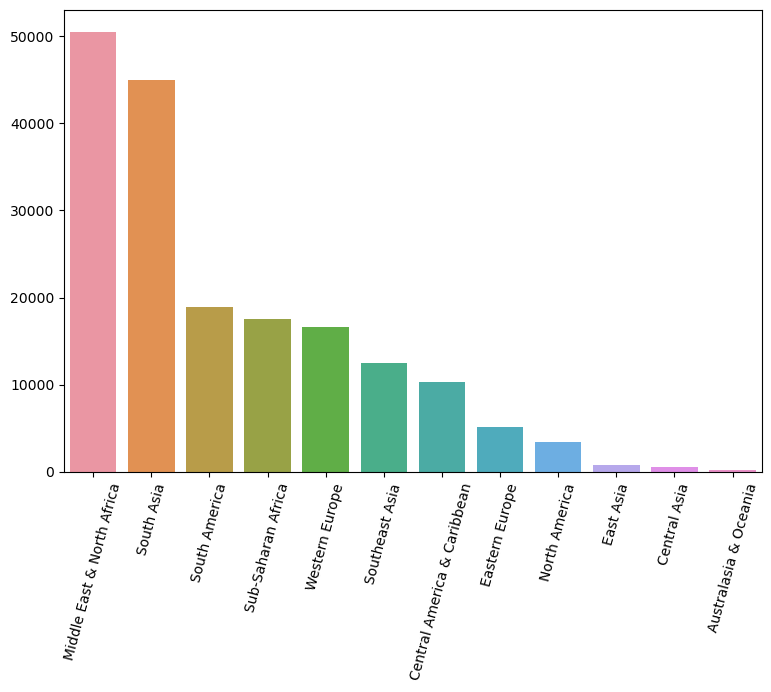

In [36]:
plt.subplots(figsize=(9,6))
sns.barplot(x=df['region_txt'].value_counts().index,y= df['region_txt'].value_counts().values)
plt.xticks(rotation=75)
plt.show()

## Africa and Asia Regions are Mostly Affected. 
### The Reason Can Be that they are Less-Devloped and Highly Densed Population.

In [17]:
#  Now Lets Look at which Countries are affected Most due to Terrorist activities

C:\Users\harsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


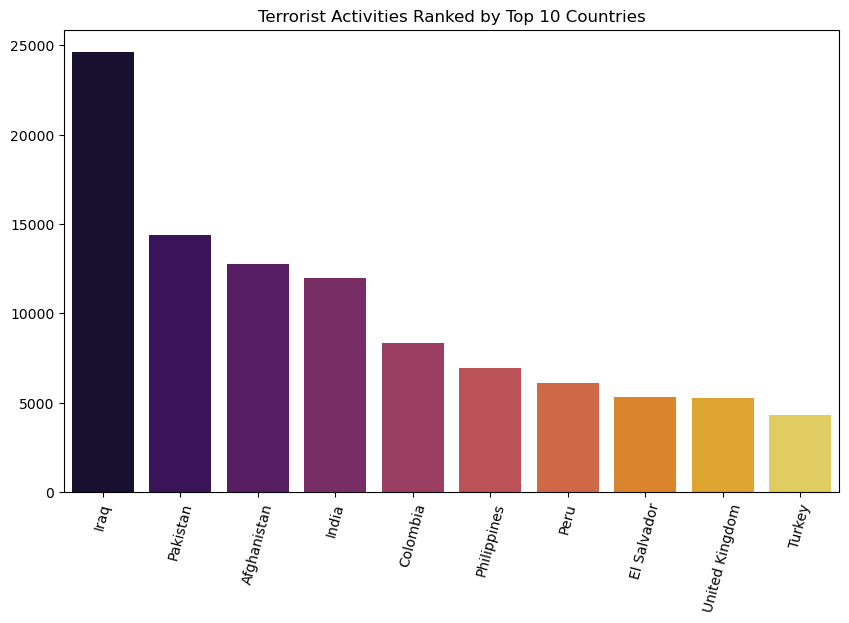

In [18]:
plt.subplots(figsize=(10,6))
sns.barplot(df['country_txt'].value_counts()[:10].index,df['country_txt'].value_counts()[:10].values,palette='inferno')
plt.xticks(rotation=75)
plt.title("Terrorist Activities Ranked by Top 10 Countries")
plt.show()

#  As we can see iraq is the most affected Country. it is Due to Weak Infrastructure in the Country .

In [19]:
df['target1'].value_counts().index.unique().value_counts()

Civilians                                              1
Felipe Batllo, president                               1
Kebede Gebre Mikael, treasurer                         1
body guards                                            1
Mercedes Benz Dealership                               1
                                                      ..
Member: Aboubacar Sylla                                1
Leader: Mohamed Qahtan                                 1
Vehicle of Assistant Sub-Inspector (ASI): Arif Baig    1
Vehicle of Worker                                      1
Hmeymim Air Base                                       1
Length: 86006, dtype: int64

In [20]:
# Which Organizations Created the Most Havoc. 

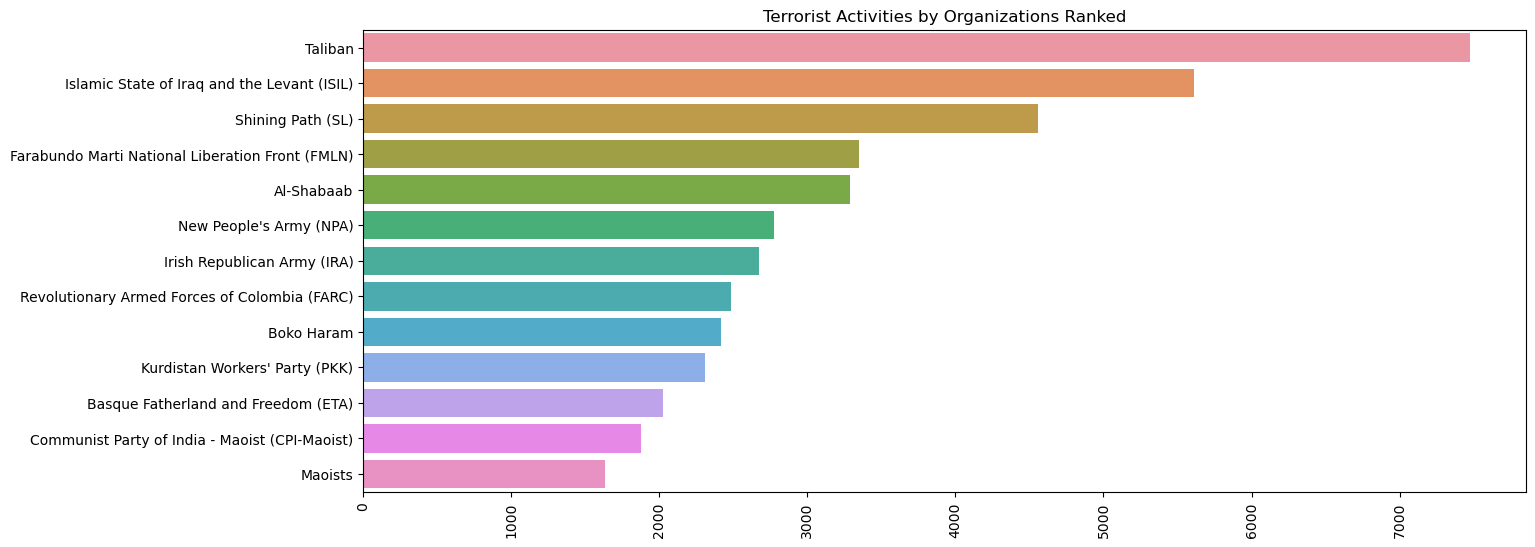

In [21]:
plt.subplots(figsize=(15,6))
sns.barplot(y=df['gname'].value_counts()[1:14].index,x=df['gname'].value_counts().values[1:14])
plt.title("Terrorist Activities by Organizations Ranked")
plt.xticks(rotation=90)
plt.show()

## Taliban created the Most Havoc followed by Isil and FMLN

In [22]:
# terrorist 

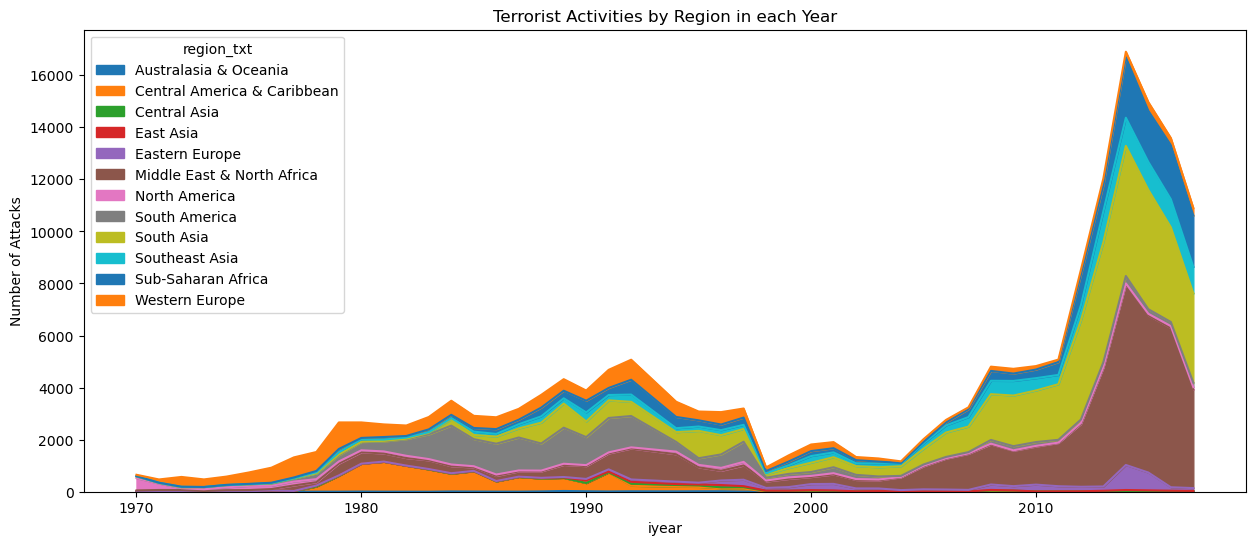

In [23]:
pd.crosstab(df.iyear, df.region_txt).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

In [24]:
print('Country with Highest Terrorist Attacks:', df['country_txt'].value_counts().idxmax() )

print('Region with Highest Terrorist Attacks:', df['region_txt'].value_counts().idxmax() )

print('Maximum people killed in an attack are:',df['nkill'].max(),'that took place in', df.loc[df['nkill'].idxmax(), 'country_txt'])

print("Year with the most attacks:",df['iyear'].value_counts().idxmax())

print("Month with the most attacks:",df['imonth'].value_counts().idxmax())

print("Most Attack Types:",df['attacktype1_txt'].value_counts().idxmax())

print('Terrorist Group with Highest Terror Attacks:', df['gname'].value_counts()[1:10].idxmax())

Country with Highest Terrorist Attacks: Iraq
Region with Highest Terrorist Attacks: Middle East & North Africa
Maximum people killed in an attack are: 1570.0 that took place in Iraq
Year with the most attacks: 2014
Month with the most attacks: 5
Most Attack Types: Bombing/Explosion
Terrorist Group with Highest Terror Attacks: Taliban


### As we can see that ,The Increase in Terriorist Attacks has been at least more than 8 times the Starting Number.
### The most Numbers show up in Middle East  and North Africa.
### Iraq Comes on top with Highest Terrorist Attacks
### Taliban is the Most Active Terrorist Organization.
### Most Common Attack is Bombing/Explosion


Thank You!